# Unsupervised Learning Framework for Anomaly Detection in Exoplanet Data

In [1]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

1. Loading the Dataset

In [2]:
# CSV structure: ['planet_radius', 'orbital_period', 'stellar_temp', 'flux_received', 'eccentricity']
data = pd.read_csv("exoplanet_features.csv")

2. Data Preprocessing

In [3]:
features = data.select_dtypes(include=[np.number]).dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

3. Dimensionality Reduction

In [4]:
pca = PCA(n_components=3)
pca_features = pca.fit_transform(scaled_features)

4. Anomaly Detection with Isolation Forest

In [5]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['anomaly_score'] = iso_forest.fit_predict(pca_features)
data['anomaly'] = data['anomaly_score'] == -1

5. Clustering with DBSCAN for Group Anomalies

In [6]:
db = DBSCAN(eps=0.5, min_samples=5)
data['cluster'] = db.fit_predict(pca_features)

6. t-SNE for Visualisation

In [7]:
# tsne = TSNE(n_components=2, perplexity=30, n_iter=3000, random_state=42)
# tsne = TSNE(n_components=2, perplexity=3, n_iter=3000, random_state=42)
tsne = TSNE(n_components=2, perplexity=3, max_iter=3000, random_state=42)
tsne_results = tsne.fit_transform(pca_features)
data['tsne-1'] = tsne_results[:, 0]
data['tsne-2'] = tsne_results[:, 1]

7. Visualisation

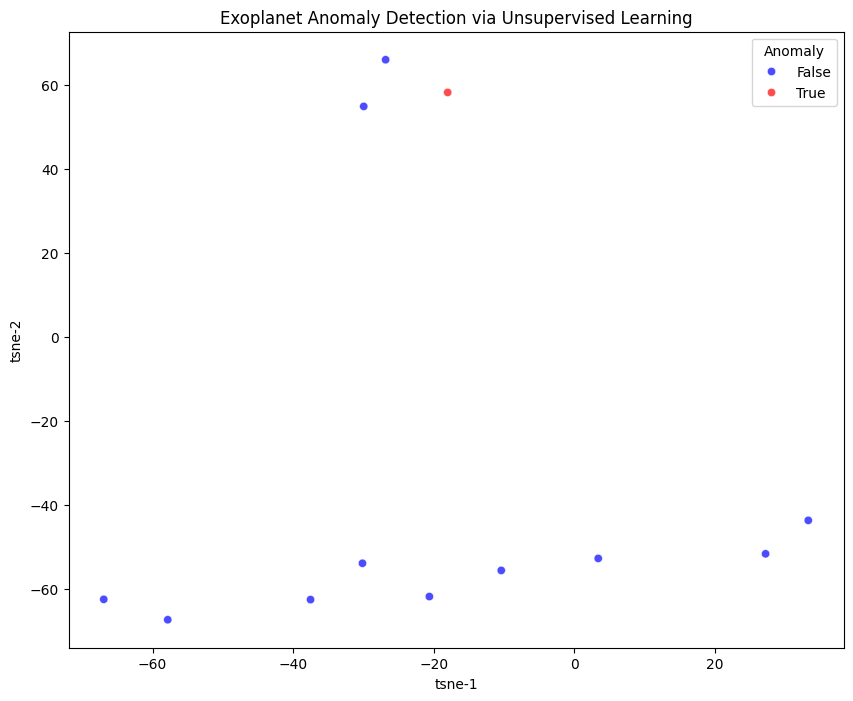

In [8]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne-1', y='tsne-2', hue='anomaly', data=data, palette={True: 'red', False: 'blue'}, alpha=0.7)
plt.title("Exoplanet Anomaly Detection via Unsupervised Learning")
plt.legend(title='Anomaly')
plt.show()

8. Saving Anomalies for further use

In [9]:
anomalies = data[data['anomaly'] == True]
anomalies.to_csv("flagged_exoplanet_anomalies.csv", index=False)

3D Interactive Visual of Exoplanet

In [10]:
import pandas as pd
import plotly.express as px

# Loading the processed dataset
df = pd.read_csv("flagged_exoplanet_anomalies.csv")

required_cols = ['planet_radius', 'orbital_period', 'stellar_temp', 'anomaly']
if not all(col in df.columns for col in required_cols):
    raise ValueError("Dataset must contain planet_radius, orbital_period, stellar_temp, and anomaly columns.")

# Plotly 3D scatter plot
fig = px.scatter_3d(
    df,
    x='planet_radius',
    y='orbital_period',
    z='stellar_temp',
    color='anomaly',
    symbol='anomaly',
    title='3D Interactive Visualisation of Exoplanets',
    labels={'planet_radius': 'Radius (R⊕)', 'orbital_period': 'Orbital Period (days)', 'stellar_temp': 'Stellar Temp (K)'},
     # Show all info when hovered
    hover_data=df.columns
)

fig.update_traces(marker=dict(size=6))
fig.show()

Pair Grid

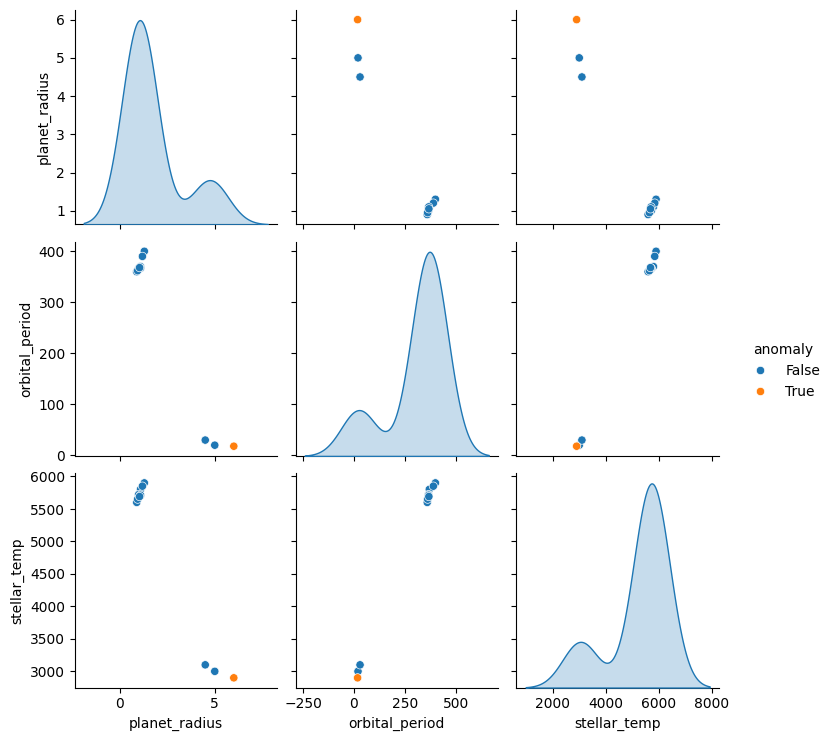

In [11]:
sns.pairplot(data, hue="anomaly", vars=['planet_radius', 'orbital_period', 'stellar_temp'])

The Feature Correlation Matrix

Text(0.5, 1.0, 'Feature - Correlation Matrix')

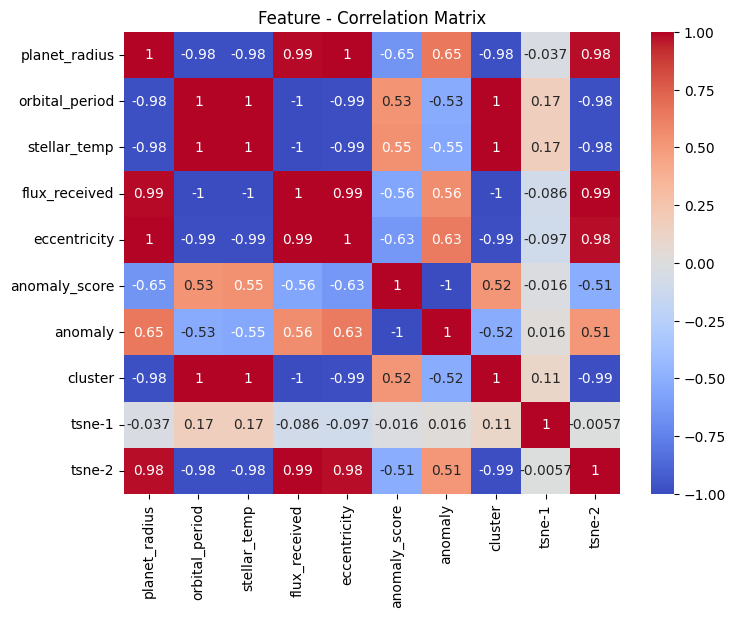

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature - Correlation Matrix")

Box Plot

<Axes: xlabel='anomaly', ylabel='planet_radius'>

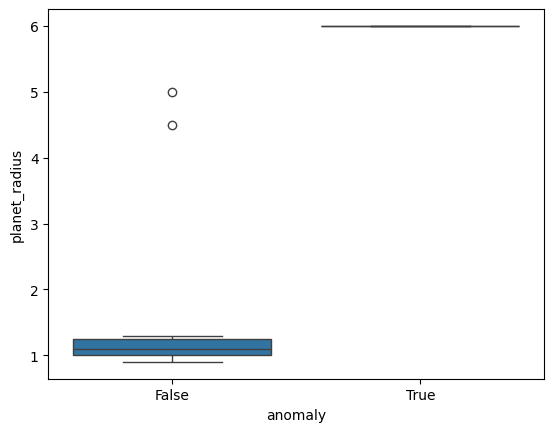

In [13]:
sns.boxplot(x='anomaly', y='planet_radius', data=data)

<ipython-input-14-bdc58fb65ed8>:1: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



<Axes: xlabel='orbital_period', ylabel='Density'>

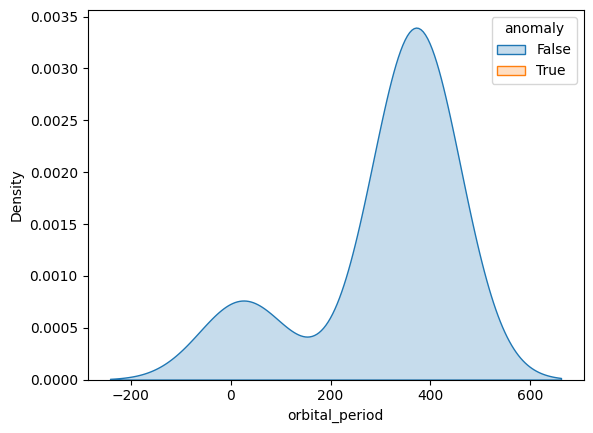

In [14]:
sns.kdeplot(data=data, x="orbital_period", hue="anomaly", fill=True)

<Axes: xlabel='anomaly_score', ylabel='Count'>

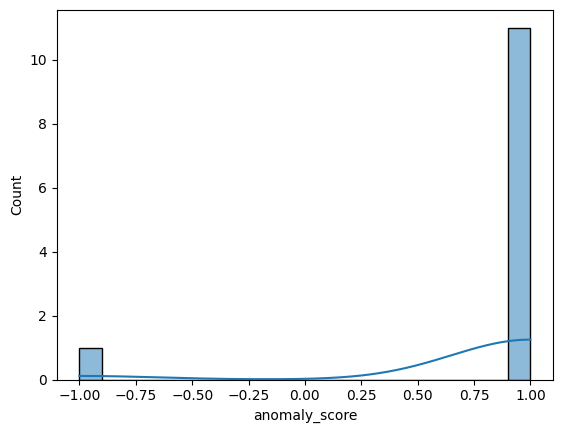

In [15]:
sns.histplot(data['anomaly_score'], bins=20, kde=True)

# Using Kepler Dataset

In [17]:
kepler_data = pd.read_csv("kepler_dataset.csv")

kepler_data.head(), kepler_data.columns

(   koi_fpflag_nt  koi_fpflag_co  koi_fpflag_ss  koi_fpflag_ec  koi_period  \
 0              0              1              0              1   32.440348   
 1              1              0              1              1   33.462393   
 2              0              0              1              1   45.470422   
 3              0              0              1              1   57.347310   
 4              0              0              1              0   68.271693   
 
    koi_count   koi_time0  koi_disposition  
 0          3  133.418728                1  
 1          3  138.362896                1  
 2          2  145.145660               -1  
 3          2  147.959293               -1  
 4          1  131.682553                1  ,
 Index(['koi_fpflag_nt', 'koi_fpflag_co', 'koi_fpflag_ss', 'koi_fpflag_ec',
        'koi_period', 'koi_count', 'koi_time0', 'koi_disposition'],
       dtype='object'))

1. Selecting features and scaling them

In [18]:
features = kepler_data.drop(columns=['koi_disposition'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

2. Applying PCA for dimensionality reduction

In [19]:
pca = PCA(n_components=3)
pca_features = pca.fit_transform(scaled_features)

 3. Applying Isolation Forest for anomaly detection

In [20]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
kepler_data['anomaly_score'] = iso_forest.fit_predict(pca_features)
kepler_data['anomaly'] = kepler_data['anomaly_score'] == -1

4. Applying t-SNE for visualisation

In [22]:
tsne = TSNE(n_components=2, perplexity=3, random_state=42, max_iter=3000)
tsne_results = tsne.fit_transform(pca_features)
kepler_data['tsne-1'] = tsne_results[:, 0]
kepler_data['tsne-2'] = tsne_results[:, 1]

5. Plotting the results

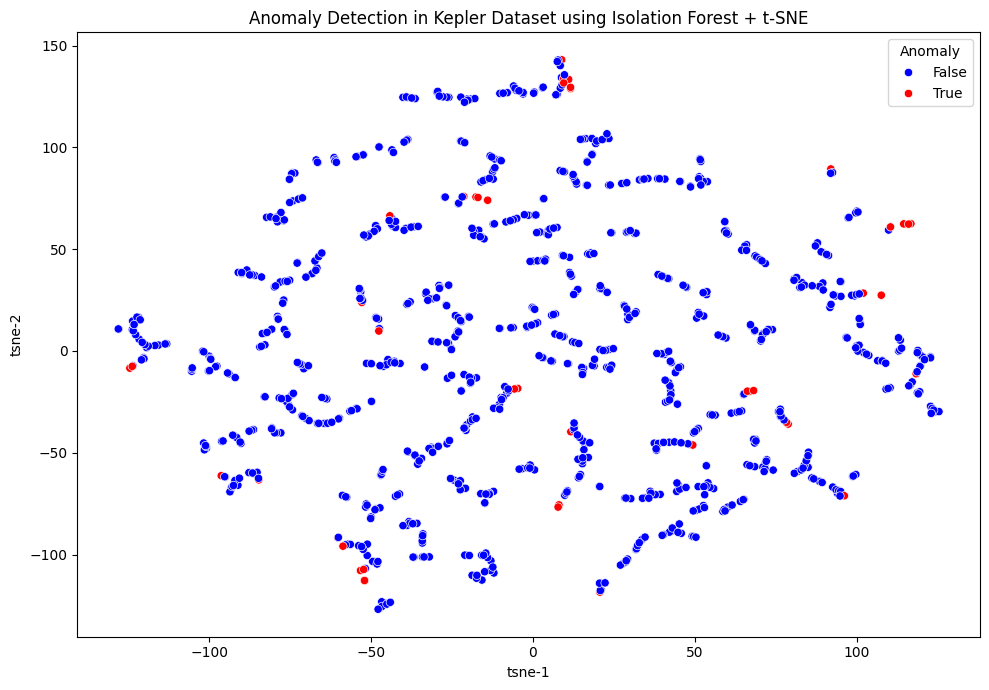

In [23]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='tsne-1', y='tsne-2', hue='anomaly', data=kepler_data, palette={True: 'red', False: 'blue'})
plt.title("Anomaly Detection in Kepler Dataset using Isolation Forest + t-SNE")
plt.legend(title="Anomaly")
plt.tight_layout()
plt.show()